<div class="alert alert-danger" style="color:black"><b>Running ML-LV Jupyter Notebooks:</b><br>
    <ol>
        <li>Make sure you are running all notebooks using the <code>adv_ai</code> kernel.
        <li><b>It is very important that you do not create any additional files within the weekly folders on CSCT cloud.</b> Any additional files, or editing the notebooks with a different environment may prevent submission/marking of your work.</li>
            <ul>
                <li>NBGrader will automatically fetch and create the correct folders files for you.</li>
                <li>All files that are not the Jupyter notebooks should be stored in the 'ML-LV/data' directory.</li>
            </ul>
        <li>Please <b>do not pip install</b> any python packages (or anything else). You should not need to install anything to complete these notebooks other than the packages provided in the Jupyter CSCT Cloud environment.</li>
    </ol>
    <b>If you would like to run this notebook locally you should:</b><br>
    <ol>
        <li>Create an environment using the requirements.txt file provided. <b>Any additional packages you install will not be accessible when uploaded to the server and may prevent marking.</b></li>
        <li>Download a copy  of the notebook to your own machine. You can then edit the cells as you wish and then go back and copy the code into/edit the ones on the CSCT cloud in-place.</li>
        <li><b>It is very important that you do not re-upload any notebooks that you have edited locally.</b> This is because NBGrader uses cell metadata to track marked tasks. <b>If you change this format it may prevent marking.</b></li>
    </ol>
</div>

# 2 Unsupervised Image Classification

## 2.0 Import libraries

1. [UMAP](https://umap-learn.readthedocs.io/en/latest/index.html) - is a Python library for applying Uniform Manifold Approximation and Projection (UMAP), a dimension reduction technique.

2. [HDBSCAN](https://hdbscan.readthedocs.io/en/latest/) - is a Python library implementing the HDBSCAN algorithm.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress Tensorflow messages
import numpy as np
import matplotlib.pyplot as plt
import umap
import hdbscan
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
import tensorflow as tf
%matplotlib inline

# Get the status of NBgrader (for skipping cell execution while validating/grading)
grading = True if os.getenv('NBGRADER_EXECUTION') else False

# Set seaborn style for matplotlib plots
plt.style.use('seaborn-v0_8-white')

# Get the project directory (should be in ML-LV)
path = ''
while os.path.basename(os.path.abspath(path)) != 'ML-LV':
    path = os.path.abspath(os.path.join(path, '..'))

# Set the directory to the datasets folder (should be in shared/datasets/mnist)
datasets_dir = os.path.join(path, '..', 'shared', 'datasets', 'mnist')

## 2.1 Load and pre-process the data

Load the data in the same manner as before, only this time we will also flatten the images into arrays of size 784.

Number of training images = 60000
Number of testing images = 10000
Shape of the training images = (60000, 28, 28)


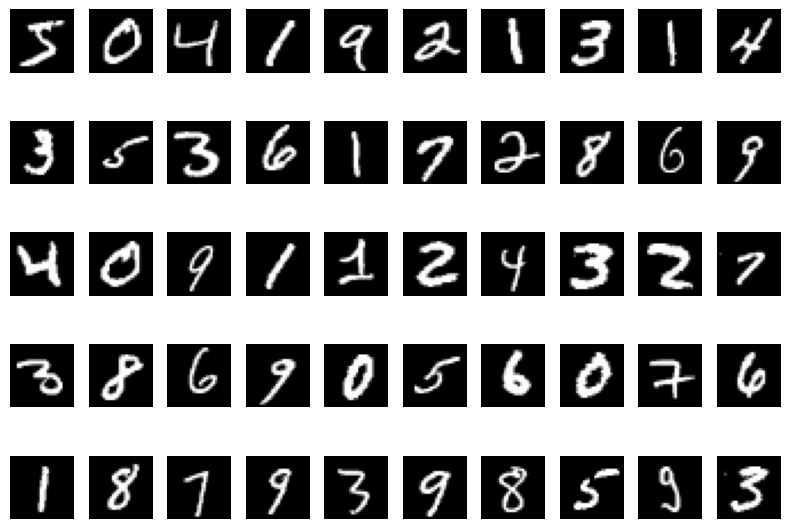

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path=os.path.join(datasets_dir, 'mnist.npz'))

# Display the number and shape of the images
print(f"Number of training images = {len(X_train)}")
print(f"Number of testing images = {len(X_test)}")
print(f"Shape of the training images = {X_train.shape}")

# Display some digits
fig, ax = plt.subplots(5, 10, figsize=(8, 6))
ax = ax.ravel()
for i in range(50):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].axis('off')
fig.tight_layout()
plt.show()

# Flatten the images to shape=(num_images, 784)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

## 2.2 UMAP

UMAP (Uniform Manifold Approximation and Projection for Dimension Reduction) is a dimension reduction algorithm based on manifold learning.  UMAP constructs a high-dimensional graph representation of the data and then constructs a low-dimensional graph which is as structurally similar as possible.

The code below reduces the MNIST data to just ```n_components``` (features) using:
- ```n_neighbors``` the number of nearest neighbours to consider.
- ```min_dist``` the minimum distance between the resulting data-points.

In [5]:
if not grading:
    # Create and train a UMAP model
    umap_model = umap.UMAP(n_neighbors=5, min_dist=0.0, n_components=2, n_jobs=2, verbose=True)
    umap_model.fit(X_train)

    # Transform the data
    X_train_umap = umap_model.transform(X_train)
    X_test_umap = umap_model.transform(X_test)
    print(f"UMAP train data shape: {X_train_umap.shape}")
    print(f"UMAP test data shape: {X_test_umap.shape}")

UMAP(min_dist=0.0, n_jobs=2, n_neighbors=5, verbose=True)
Fri Mar 21 18:08:03 2025 Construct fuzzy simplicial set
Fri Mar 21 18:08:03 2025 Finding Nearest Neighbors
Fri Mar 21 18:08:03 2025 Building RP forest with 17 trees
Fri Mar 21 18:08:05 2025 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Fri Mar 21 18:08:06 2025 Finished Nearest Neighbor Search
Fri Mar 21 18:08:06 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Mar 21 18:08:16 2025 Finished embedding
Fri Mar 21 18:08:18 2025 Worst tree score: 0.34406667
Fri Mar 21 18:08:18 2025 Mean tree score: 0.35155588
Fri Mar 21 18:08:18 2025 Best tree score: 0.35890000
Fri Mar 21 18:08:18 2025 Forward diversification reduced edges from 300000 to 221744
Fri Mar 21 18:08:18 2025 Reverse diversification reduced edges from 221744 to 221744
Fri Mar 21 18:08:18 2025 Degree pruning reduced edges from 225722 to 225064
Fri Mar 21 18:08:18 2025 Resorting data and graph based on tree order
Fri Mar 21 18:08:18 2025 Building and compiling search function


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs
UMAP train data shape: (60000, 2)
UMAP test data shape: (10000, 2)


Display the dimensionally reduced data using the MNIST labels to colour each point.

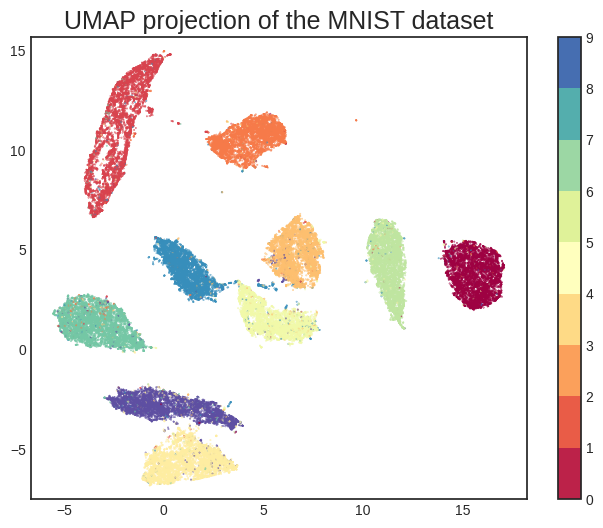

In [6]:
if not grading:
    # Display the UMAP projection
    plt.figure(figsize=(8, 6))
    plt.scatter(x=X_train_umap[:, 0], y=X_train_umap[:, 1], c=y_train, cmap='Spectral', s=0.1)
    plt.gca().set_aspect('equal', 'datalim')
    plt.colorbar(boundaries=np.arange(10)).set_ticks(np.arange(10))
    plt.title('UMAP projection of the MNIST dataset', fontsize=18)
    plt.show()

## 2.3 HDBSCAN

HDBSCAN (Hierarchical Density-Based Spatial Clustering and Application with Noise) is a hierarchical clustering algorithm which separates clusters of high density from low density – each point of a cluster must have a minimum number of points within a given neighbourhood/radius.

It has several advantages over K-means and DBSCAN because we do not need to specify number of clusters and clusters can be varying shapes/sizes, unlike K-Means. It is also more robust to noise and outliers.

Data with a large number of features will take a long time to cluster (and results may be less accurate), so we will use the data with a reduced number of dimensions via the UMAP algorithm.

Then create the HDBSCAN model with the parameters:
- ```min_cluster_size``` the minimum number of points allowed within a cluster.
- ```min_samples``` the k-nearest neighbours to consider when calculating the *core distance* and *mutual reachability distance*.
- ```prediction_data``` keeps information about the reduced MST for making predictions later on.

### Train and evaluate the model

In [7]:
if not grading:
    # Create and train a HDBSCAN model with dimensionally reduced data
    hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=500, min_samples=10, prediction_data=True)
    train_preds = hdbscan_model.fit_predict(X_train_umap)
    print(f"Number of clusters: {len(np.unique(train_preds))}")

Number of clusters: 11


Evaluate the resulting clusters with the ARI and AMI scores. We can also find out what percentage of the data was clustered by the algorithm and thus how many points 'fell out' of clusters and were considered outliers.

We can also plot the data points that were not clustered in grey, and overlay those that were using the cluster labels to colour the points.

ARI and AMI scores for all data: 0.9204, 0.9053
ARI and AMI scores for clustered data: 0.9247, 0.9109
Percentage of clustered data: 0.9957


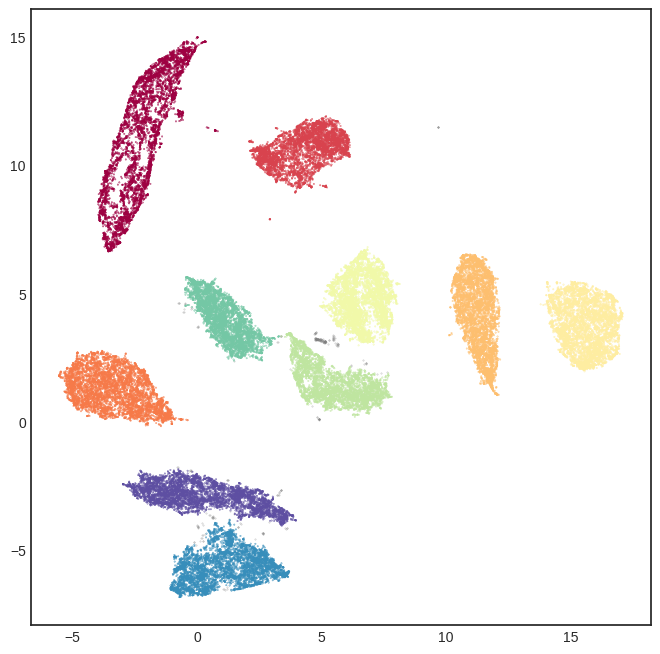

In [8]:
if not grading:
    # Find the clustered datapoints
    clustered = (train_preds >= 0)
    plt.figure(figsize=(8, 8))
    plt.scatter(x=X_train_umap[~clustered, 0], y=X_train_umap[~clustered, 1], color=(0.5, 0.5, 0.5), s=0.1, alpha=0.5)
    plt.scatter(x=X_train_umap[clustered, 0], y=X_train_umap[clustered, 1], c=train_preds[clustered], s=0.1, cmap='Spectral')

    # Get Rand index and Mutual information scores for all data and clustered data
    rand_all = adjusted_rand_score(y_train, train_preds)
    mi_all = adjusted_mutual_info_score(y_train, train_preds) 
    rand_clustered = adjusted_rand_score(y_train[clustered], train_preds[clustered]) 
    mi_clustered = adjusted_mutual_info_score(y_train[clustered], train_preds[clustered])

    # Get the percentage of clustered data
    clustered_perc = np.sum(clustered) / X_train.shape[0]

    # Print the results
    print(f"ARI and AMI scores for all data: {rand_all:.4f}, {mi_all:.4f}")
    print(f"ARI and AMI scores for clustered data: {rand_clustered:.4f}, {mi_clustered:.4f}")
    print(f"Percentage of clustered data: {clustered_perc:.4f}")

Now we can use the HDBSCAN model to make predictions about the MNIST test data using the ```approximate_predict()``` function. This function returns the labels of the newly clustered points as well as the strength of the cluster membership, which is the normalised $\lambda_p$ values for each point.

Next we can overlay the clustered test data onto the original cluster plot and measure the ARI and AMI as before.

<div class="alert alert-success" style="color:black"><b>Note:</b>
To enable plotting, here we have used UMAP to reduce the dimensions of the data to just 2. HDBSCAN is still able to produce good results. Almost all of the data is clustered and the ARI and AMI scores remain high. However, different parameters might improve results. For example:

1. Different values of ```n_neighbors```, ```min_dist``` and ```n_components``` for UMAP.

2. Different values of ```min_cluster_size``` and ```min_samples``` for HDBSCAN.
</div>

In [9]:
if not grading:
    test_preds, probs = hdbscan.approximate_predict(hdbscan_model, X_test_umap)
    print(f"Number of clusters: {len(np.unique(test_preds))}")
    print(f"Number of clustered points: {np.sum(test_preds >= 0)} / {len(test_preds)}")
    print(f"Strength of cluster membership: {np.round(probs, 2)}")

Number of clusters: 11
Number of clustered points: 9972 / 10000
Strength of cluster membership: [1.   1.   0.85 ... 0.74 1.   0.67]


ARI and AMI scores for all data: 0.8032, 0.7909
ARI and AMI scores for clustered data: 0.8056, 0.7941
Percentage of clustered data: 0.9972


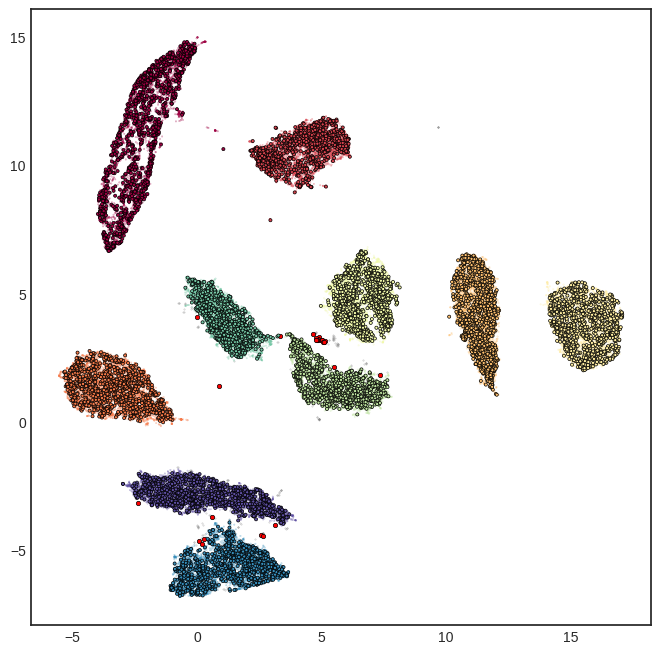

In [10]:
if not grading:
    # Plot the training data
    clustered = (train_preds >= 0)
    plt.figure(figsize=(8, 8))
    plt.scatter(x=X_train_umap[~clustered, 0], y=X_train_umap[~clustered, 1], color=(0.5, 0.5, 0.5), s=0.1, alpha=0.5)
    plt.scatter(x=X_train_umap[clustered, 0], y=X_train_umap[clustered, 1], c=train_preds[clustered], s=0.1, alpha=0.5, cmap='Spectral')

    # Plot the test data
    test_clustered = (test_preds >= 0)
    plt.scatter(x=X_test_umap[~test_clustered, 0], y=X_test_umap[~test_clustered, 1], color='red', s=10, linewidths=0.5, edgecolors='k')
    plt.scatter(x=X_test_umap[test_clustered, 0], y=X_test_umap[test_clustered, 1], c=test_preds[test_clustered], s=5, cmap='Spectral', linewidths=0.5, edgecolors='k')

    # Get Rand index and Mutual information scores for all data and clustered data
    rand_all = adjusted_rand_score(y_test, test_preds)
    mi_all = adjusted_mutual_info_score(y_test, test_preds) 
    rand_clustered = adjusted_rand_score(y_test[test_clustered], test_preds[test_clustered]) 
    mi_clustered = adjusted_mutual_info_score(y_test[test_clustered], test_preds[test_clustered])

    # Get the percentage of clustered data
    clustered_perc = np.sum(test_clustered) / X_test.shape[0]

    # Print the results
    print(f"ARI and AMI scores for all data: {rand_all:.4f}, {mi_all:.4f}")
    print(f"ARI and AMI scores for clustered data: {rand_clustered:.4f}, {mi_clustered:.4f}")
    print(f"Percentage of clustered data: {clustered_perc:.4f}")

<div class="alert alert-success" style="color:black"><h3>Before you submit this notebook to NBGrader for marking:</h3> 

1. Make sure have completed all exercises marked by <span style="color:blue">**blue cells**</span>.
2. For automatically marked exercises ensure you have completed any cells with `# YOUR CODE HERE`. Then click 'Validate' button above, or ensure all cells run without producing an error.
3. For manually marked exercises ensure you have completed any cells with `"YOUR ANSWER HERE"`.
4. Ensure all cells are run with their output visible.
5. Fill in your student ID (**only**) below.
6. You should now **save and download** your work.

</div>

**Student ID:** 15006280
